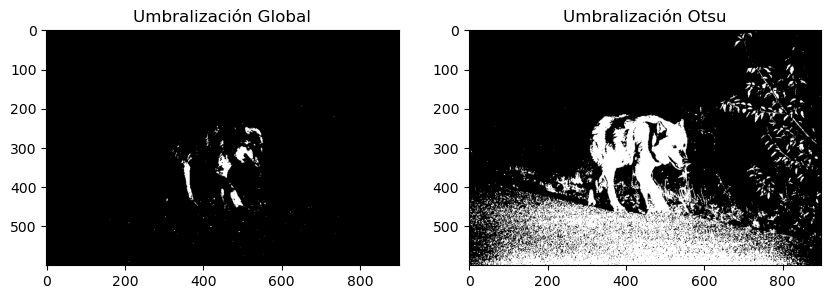

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation
from skimage import color
from skimage.io import imread

def segmentacion_umbral(image_path):
    # Cargar imagen en escala de grises
    img = cv2.imread(image_path, 0)
    
    # Umbralización global
    _, thresh_global = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    # Umbralización de Otsu
    _, thresh_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Mostrar resultados
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(thresh_global, cmap='gray'), plt.title('Umbralización Global')
    plt.subplot(1, 2, 2), plt.imshow(thresh_otsu, cmap='gray'), plt.title('Umbralización Otsu')
    plt.show()

# Llamada a la función
segmentacion_umbral('lobo.jpg')


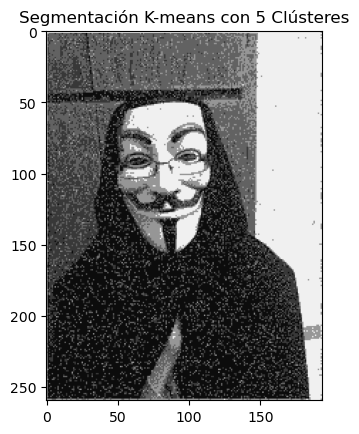

In [13]:
def segmentacion_kmeans(image_path, k=3):
    # Cargar imagen en color
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convertir a un arreglo de píxeles
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Definir criterios de parada y aplicar K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convertir centros de clúster a valores enteros
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img_rgb.shape)
    
    # Mostrar resultado
    plt.imshow(segmented_image)
    plt.title(f'Segmentación K-means con {k} Clústeres')
    plt.show()

# Llamada a la función
segmentacion_kmeans('hacker.jpeg', k=5)


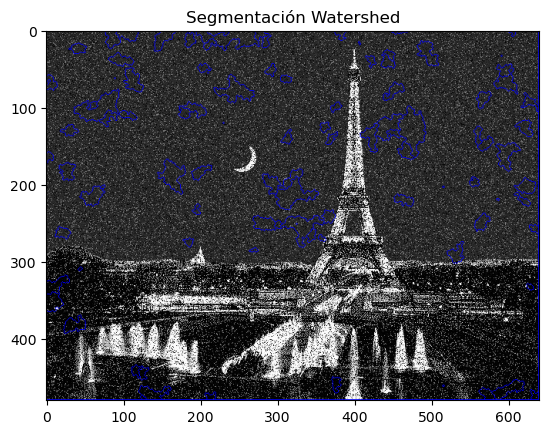

In [14]:
def segmentacion_watershed(image_path):
    # Cargar imagen
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Binarización
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Remover ruido
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Identificar áreas de fondo
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Encontrar área de objetos
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    
    # Marcar el área desconocida
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marcar los objetos
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Sumar 1 a los marcadores
    markers = markers + 1
    markers[unknown == 255] = 0
    
    # Aplicar watershed
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255, 0, 0]
    
    # Mostrar resultado
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Segmentación Watershed')
    plt.show()

# Llamada a la función
segmentacion_watershed('paris.jpg')


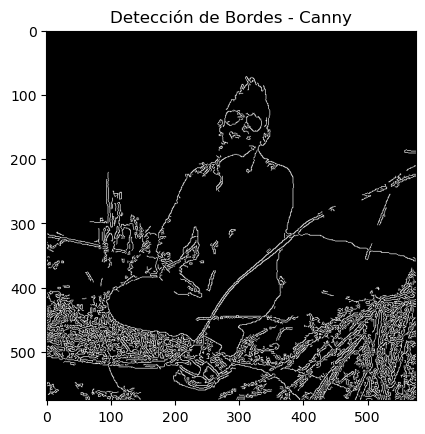

In [15]:
def segmentacion_canny(image_path):
    # Cargar imagen en escala de grises
    img = cv2.imread(image_path, 0)
    
    # Aplicar filtro Canny para detectar bordes
    edges = cv2.Canny(img, 100, 200)
    
    # Mostrar resultado
    plt.imshow(edges, cmap='gray')
    plt.title('Detección de Bordes - Canny')
    plt.show()

# Llamada a la función
segmentacion_canny('perfil.jpg')


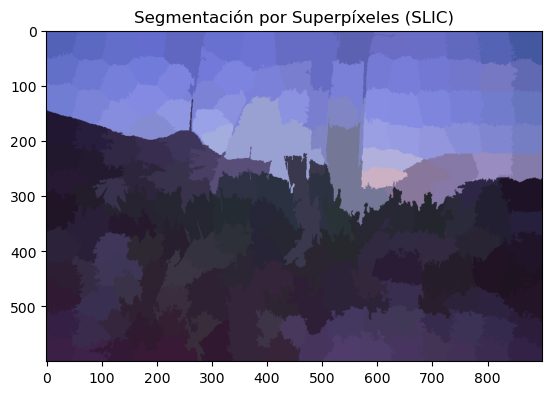

In [17]:

def segmentacion_slic(image_path):
    # Cargar imagen
    img = imread(image_path)
    
    # Aplicar SLIC
    segments = segmentation.slic(img, n_segments=200, compactness=10)
    
    # Mostrar resultado
    plt.imshow(color.label2rgb(segments, img, kind='avg'))
    plt.title('Segmentación por Superpíxeles (SLIC)')
    plt.show()

# Llamada a la función
segmentacion_slic('desierto.jpg')
